# Projeto de Modelagem Preditiva com Python e TensorFlow

#### Mini-Projeto básico de modelagem preditiva usando linguagem Python e TensorFlow, um dos principais framework para construção de modelos de Machine Learning e para construir aplicações comerciais usando Inteligência Artificial.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Jupyter Notebook:', python_version())

Versão da Linguagem Python usada neste Jupyter Notebook: 3.9.12


In [2]:
# Instalando o TensorFlow
!pip install -q tensorflow

In [3]:
# Instalando o Pydot
!pip install -q pydot

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.10.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características
* Números de Observações: 506
* Os primeiros 13 recursossão recursos preditivos / categóricos
* O último (atributo 14): o valor mediano é a variável de destino

In [6]:
# Importando os dados 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [7]:
# Lista com os nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [8]:
# Carregando os dados 
dataset = pd.read_csv(dataset_path,
                     names = nomes_colunas,
                     na_values = '?',
                     comment = '\t',
                     sep = ' ',
                     skipinitialspace = True)

In [9]:
# Shape
dataset.shape

(506, 14)

In [10]:
# Visualizando os dados 
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Os dados serão divididos em treino e teste com proporção 80/20

In [11]:
# Split dos dados 
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples
##### Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).
    * Variável Independente: 'RM' (variável de entrada)
    * Variável Dependente: 'MEDV' (variável de saída, alvo ou destino)
##### Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Criando um Plot mostrando a relação atual entre as variáveis

Basicamente temmos MEDV = f(RM) e queremos estimar a função f() usando regressão linear.

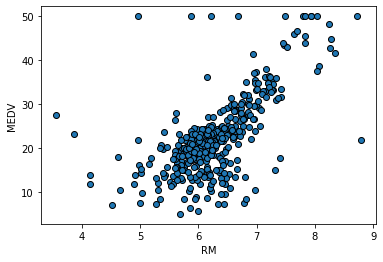

In [12]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()
# Observa-se que conforme aumenta o número de quartos,também aumenta o valor da mediana

Separando x e y.

In [13]:
# Divisão 
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

### Criando o Modelo
Queremos encontrar os parâmetros (**W**) que permitem prever a saída de Y a partir da entrada de X:

𝑦=𝑤1𝑥+𝑤0 

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

layers.Dense(1, use_bias=True, input_shape=(1,))

In [14]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])
    
    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01,
                                        beta_1 = 0.9,
                                        beta_2 = 0.99,
                                        epsilon = 1e-05,
                                        amsgrad = False,
                                        name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
    
    return model

MAE: Mean Absolute Error

MSE: Mean Squared Error

In [15]:
# Cria o modelo
modelo = modelo_linear()

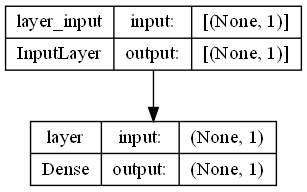

In [16]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

## Treinamento do Modelo

In [18]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [19]:
# Callback (Tecnica para limitar a aprendizagem do modelo)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                patience = n_idle_epochs,
                                                min_delta = 0.001)

In [25]:
# Lista para as previsões
predictions_list = []

In [26]:
# Caminho para salvar o Checkpoint
Checkpoint_path = 'dados/'

In [27]:
# Cria um retorno de chamada que salve os pesos do modelo a cada n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = 'dados/',
                                                       verbose = 1,
                                                       save_weights_only = True,
                                                       save_freq = n_samples_save)

In [29]:
# Salva a primeira versão do modelo
modelo.save_weights(Checkpoint_path.format(epoch = 0))

In [30]:
# Treinamento
history = modelo.fit(x_treino,
                    y_treino,
                    batch_size = batch_size,
                    epochs = n_epochs,
                    validation_split = 0.1,
                    verbose = 1,
                    callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 5s 2s/step - loss: 961.0796 - mae: 29.5722 - mse: 961.0796 - val_loss: 1068.1635 - val_mae: 30.8725 - val_mse: 1068.1635
Epoch 2/4000
2/2 [==============================] - 0s 192ms/step - loss: 952.4375 - mae: 29.4270 - mse: 952.4375 - val_loss: 1059.0363 - val_mae: 30.7268 - val_mse: 1059.0363
Epoch 3/4000
2/2 [==============================] - 0s 186ms/step - loss: 943.7340 - mae: 29.2821 - mse: 943.7340 - val_loss: 1049.9695 - val_mae: 30.5813 - val_mse: 1049.9695
Epoch 4/4000
2/2 [==============================] - 0s 220ms/step - loss: 934.9734 - mae: 29.1368 - mse: 934.9734 - val_loss: 1040.9487 - val_mae: 30.4358 - val_mse: 1040.9487
Epoch 5/4000
2/2 [==============================] - 0s 230ms/step - loss: 926.4230 - mae: 28.9921 - mse: 926.4230 - val_loss: 1031.9639 - val_mae: 30.2903 - val_mse: 1031.9639
Epoch 6/4000
2/2 [==============================] - 0s 280ms/step - loss: 917.8694 - mae: 28.8472 - mse: 917.8694 - val_los

Epoch 48/4000
2/2 [==============================] - 0s 144ms/step - loss: 606.5972 - mae: 22.9794 - mse: 606.5972 - val_loss: 697.4124 - val_mae: 24.2639 - val_mse: 697.4124
Epoch 49/4000
2/2 [==============================] - 0s 390ms/step - loss: 600.3130 - mae: 22.8464 - mse: 600.3130 - val_loss: 690.8624 - val_mae: 24.1311 - val_mse: 690.8624
Epoch 50/4000
2/2 [==============================] - 0s 147ms/step - loss: 594.1014 - mae: 22.7143 - mse: 594.1014 - val_loss: 684.3622 - val_mae: 23.9985 - val_mse: 684.3622
Epoch 51/4000
2/2 [==============================] - 0s 145ms/step - loss: 588.0217 - mae: 22.5822 - mse: 588.0217 - val_loss: 677.9064 - val_mae: 23.8662 - val_mse: 677.9064
Epoch 52/4000
2/2 [==============================] - 0s 338ms/step - loss: 581.9180 - mae: 22.4505 - mse: 581.9180 - val_loss: 671.5099 - val_mae: 23.7343 - val_mse: 671.5099
Epoch 53/4000
2/2 [==============================] - 0s 196ms/step - loss: 575.9272 - mae: 22.3193 - mse: 575.9272 - val_loss

Epoch 95/4000
2/2 [==============================] - 0s 182ms/step - loss: 362.6377 - mae: 17.0529 - mse: 362.6377 - val_loss: 439.3482 - val_mae: 18.3251 - val_mse: 439.3482
Epoch 96/4000
2/2 [==============================] - 0s 227ms/step - loss: 358.4716 - mae: 16.9332 - mse: 358.4716 - val_loss: 434.8592 - val_mae: 18.2049 - val_mse: 434.8592
Epoch 97/4000
2/2 [==============================] - 0s 144ms/step - loss: 354.3613 - mae: 16.8144 - mse: 354.3613 - val_loss: 430.4169 - val_mae: 18.0852 - val_mse: 430.4169
Epoch 98/4000
2/2 [==============================] - 0s 144ms/step - loss: 350.1577 - mae: 16.6955 - mse: 350.1577 - val_loss: 426.0301 - val_mae: 17.9662 - val_mse: 426.0301
Epoch 99/4000
2/2 [==============================] - 0s 153ms/step - loss: 346.1006 - mae: 16.5780 - mse: 346.1006 - val_loss: 421.6703 - val_mae: 17.8471 - val_mse: 421.6703
Epoch 100/4000
2/2 [==============================] - 0s 135ms/step - loss: 342.1343 - mae: 16.4608 - mse: 342.1343 - val_los

2/2 [==============================] - 0s 137ms/step - loss: 207.2440 - mae: 12.0595 - mse: 207.2440 - val_loss: 271.7253 - val_mae: 13.3616 - val_mse: 271.7253
Epoch 142/4000
2/2 [==============================] - 0s 143ms/step - loss: 204.6460 - mae: 11.9637 - mse: 204.6460 - val_loss: 268.8960 - val_mae: 13.2716 - val_mse: 268.8960
Epoch 143/4000
2/2 [==============================] - 0s 146ms/step - loss: 202.0852 - mae: 11.8687 - mse: 202.0852 - val_loss: 266.0910 - val_mae: 13.1816 - val_mse: 266.0910
Epoch 144/4000
2/2 [==============================] - 0s 128ms/step - loss: 199.5609 - mae: 11.7730 - mse: 199.5609 - val_loss: 263.3101 - val_mae: 13.0916 - val_mse: 263.3101
Epoch 145/4000
2/2 [==============================] - 0s 151ms/step - loss: 197.0633 - mae: 11.6796 - mse: 197.0633 - val_loss: 260.5573 - val_mae: 13.0019 - val_mse: 260.5573
Epoch 146/4000
2/2 [==============================] - 0s 141ms/step - loss: 194.5697 - mae: 11.5844 - mse: 194.5697 - val_loss: 257.834

Epoch 188/4000
2/2 [==============================] - 0s 141ms/step - loss: 114.7761 - mae: 8.2632 - mse: 114.7761 - val_loss: 168.5770 - val_mae: 9.7186 - val_mse: 168.5770
Epoch 189/4000
2/2 [==============================] - 0s 140ms/step - loss: 113.4245 - mae: 8.2006 - mse: 113.4245 - val_loss: 167.0004 - val_mae: 9.6548 - val_mse: 167.0004
Epoch 190/4000
2/2 [==============================] - 0s 137ms/step - loss: 112.0570 - mae: 8.1401 - mse: 112.0570 - val_loss: 165.4505 - val_mae: 9.5915 - val_mse: 165.4505
Epoch 191/4000
2/2 [==============================] - 0s 148ms/step - loss: 110.7513 - mae: 8.0828 - mse: 110.7513 - val_loss: 163.9212 - val_mae: 9.5305 - val_mse: 163.9212
Epoch 192/4000
2/2 [==============================] - 0s 143ms/step - loss: 109.4252 - mae: 8.0217 - mse: 109.4252 - val_loss: 162.4173 - val_mae: 9.4718 - val_mse: 162.4173
Epoch 193/4000
2/2 [==============================] - 0s 135ms/step - loss: 108.1843 - mae: 7.9636 - mse: 108.1843 - val_loss: 160

2/2 [==============================] - 0s 135ms/step - loss: 71.6316 - mae: 6.1118 - mse: 71.6316 - val_loss: 116.9496 - val_mae: 7.6938 - val_mse: 116.9496
Epoch 236/4000
2/2 [==============================] - 0s 167ms/step - loss: 71.1264 - mae: 6.0822 - mse: 71.1264 - val_loss: 116.2765 - val_mae: 7.6676 - val_mse: 116.2765
Epoch 237/4000
2/2 [==============================] - 0s 137ms/step - loss: 70.6424 - mae: 6.0532 - mse: 70.6424 - val_loss: 115.6257 - val_mae: 7.6420 - val_mse: 115.6257
Epoch 238/4000
2/2 [==============================] - 0s 136ms/step - loss: 70.1012 - mae: 6.0222 - mse: 70.1012 - val_loss: 114.9994 - val_mae: 7.6169 - val_mse: 114.9994
Epoch 239/4000
2/2 [==============================] - 0s 152ms/step - loss: 69.6380 - mae: 5.9948 - mse: 69.6380 - val_loss: 114.3756 - val_mae: 7.5917 - val_mse: 114.3756
Epoch 240/4000
2/2 [==============================] - 0s 145ms/step - loss: 69.1713 - mae: 5.9669 - mse: 69.1713 - val_loss: 113.7593 - val_mae: 7.5664 - v

Epoch 283/4000
2/2 [==============================] - 0s 273ms/step - loss: 58.0441 - mae: 5.3374 - mse: 58.0441 - val_loss: 97.5256 - val_mae: 6.9418 - val_mse: 97.5256
Epoch 284/4000
2/2 [==============================] - 0s 273ms/step - loss: 57.9504 - mae: 5.3340 - mse: 57.9504 - val_loss: 97.3410 - val_mae: 6.9359 - val_mse: 97.3410
Epoch 285/4000
2/2 [==============================] - 0s 159ms/step - loss: 57.8417 - mae: 5.3305 - mse: 57.8417 - val_loss: 97.1647 - val_mae: 6.9301 - val_mse: 97.1647
Epoch 286/4000
2/2 [==============================] - 0s 158ms/step - loss: 57.7561 - mae: 5.3274 - mse: 57.7561 - val_loss: 96.9894 - val_mae: 6.9243 - val_mse: 96.9894
Epoch 287/4000
2/2 [==============================] - 0s 178ms/step - loss: 57.6536 - mae: 5.3242 - mse: 57.6536 - val_loss: 96.8173 - val_mae: 6.9186 - val_mse: 96.8173
Epoch 288/4000
2/2 [==============================] - 0s 176ms/step - loss: 57.5888 - mae: 5.3232 - mse: 57.5888 - val_loss: 96.6434 - val_mae: 6.9127

2/2 [==============================] - 0s 254ms/step - loss: 56.1971 - mae: 5.3430 - mse: 56.1971 - val_loss: 93.1186 - val_mae: 6.8536 - val_mse: 93.1186
Epoch 332/4000
2/2 [==============================] - 0s 269ms/step - loss: 56.1928 - mae: 5.3434 - mse: 56.1928 - val_loss: 93.1062 - val_mae: 6.8534 - val_mse: 93.1062
Epoch 333/4000
2/2 [==============================] - 0s 178ms/step - loss: 56.1890 - mae: 5.3438 - mse: 56.1890 - val_loss: 93.0960 - val_mae: 6.8533 - val_mse: 93.0960
Epoch 334/4000
2/2 [==============================] - 0s 288ms/step - loss: 56.1850 - mae: 5.3440 - mse: 56.1850 - val_loss: 93.0856 - val_mae: 6.8531 - val_mse: 93.0856
Epoch 335/4000
2/2 [==============================] - 0s 187ms/step - loss: 56.1813 - mae: 5.3442 - mse: 56.1813 - val_loss: 93.0704 - val_mae: 6.8530 - val_mse: 93.0704
Epoch 336/4000
2/2 [==============================] - 0s 181ms/step - loss: 56.1826 - mae: 5.3451 - mse: 56.1826 - val_loss: 93.0526 - val_mae: 6.8528 - val_mse: 93.

2/2 [==============================] - 0s 219ms/step - loss: 56.0385 - mae: 5.3697 - mse: 56.0385 - val_loss: 92.4205 - val_mae: 6.8442 - val_mse: 92.4205
Epoch 380/4000
2/2 [==============================] - 0s 182ms/step - loss: 56.0356 - mae: 5.3695 - mse: 56.0356 - val_loss: 92.4195 - val_mae: 6.8440 - val_mse: 92.4195
Epoch 381/4000
2/2 [==============================] - 0s 189ms/step - loss: 56.0331 - mae: 5.3692 - mse: 56.0331 - val_loss: 92.4156 - val_mae: 6.8439 - val_mse: 92.4156
Epoch 382/4000
2/2 [==============================] - 0s 230ms/step - loss: 56.0305 - mae: 5.3693 - mse: 56.0305 - val_loss: 92.4081 - val_mae: 6.8437 - val_mse: 92.4081
Epoch 383/4000
2/2 [==============================] - 0s 192ms/step - loss: 56.0275 - mae: 5.3695 - mse: 56.0275 - val_loss: 92.4044 - val_mae: 6.8435 - val_mse: 92.4044
Epoch 384/4000
2/2 [==============================] - 0s 158ms/step - loss: 56.0242 - mae: 5.3695 - mse: 56.0242 - val_loss: 92.3967 - val_mae: 6.8433 - val_mse: 92.

2/2 [==============================] - 0s 150ms/step - loss: 55.8680 - mae: 5.3598 - mse: 55.8680 - val_loss: 92.2998 - val_mae: 6.8349 - val_mse: 92.2998
Epoch 428/4000
2/2 [==============================] - 0s 149ms/step - loss: 55.8638 - mae: 5.3596 - mse: 55.8638 - val_loss: 92.2928 - val_mae: 6.8346 - val_mse: 92.2928
Epoch 429/4000
2/2 [==============================] - 0s 235ms/step - loss: 55.8585 - mae: 5.3594 - mse: 55.8585 - val_loss: 92.2946 - val_mae: 6.8344 - val_mse: 92.2946
Epoch 430/4000
2/2 [==============================] - 0s 280ms/step - loss: 55.8536 - mae: 5.3589 - mse: 55.8536 - val_loss: 92.2921 - val_mae: 6.8342 - val_mse: 92.2921
Epoch 431/4000
2/2 [==============================] - 0s 192ms/step - loss: 55.8495 - mae: 5.3586 - mse: 55.8495 - val_loss: 92.2898 - val_mae: 6.8339 - val_mse: 92.2898
Epoch 432/4000
2/2 [==============================] - 0s 160ms/step - loss: 55.8447 - mae: 5.3583 - mse: 55.8447 - val_loss: 92.2848 - val_mae: 6.8337 - val_mse: 92.

2/2 [==============================] - 0s 159ms/step - loss: 55.6158 - mae: 5.3467 - mse: 55.6158 - val_loss: 92.1123 - val_mae: 6.8211 - val_mse: 92.1123
Epoch 476/4000
2/2 [==============================] - 0s 165ms/step - loss: 55.6097 - mae: 5.3453 - mse: 55.6097 - val_loss: 92.1175 - val_mae: 6.8208 - val_mse: 92.1175
Epoch 477/4000
2/2 [==============================] - 0s 159ms/step - loss: 55.6032 - mae: 5.3444 - mse: 55.6032 - val_loss: 92.1165 - val_mae: 6.8205 - val_mse: 92.1165
Epoch 478/4000
2/2 [==============================] - 0s 160ms/step - loss: 55.5961 - mae: 5.3437 - mse: 55.5961 - val_loss: 92.1238 - val_mae: 6.8202 - val_mse: 92.1238
Epoch 479/4000
2/2 [==============================] - 0s 157ms/step - loss: 55.5896 - mae: 5.3425 - mse: 55.5896 - val_loss: 92.1379 - val_mae: 6.8200 - val_mse: 92.1379
Epoch 480/4000
2/2 [==============================] - 0s 159ms/step - loss: 55.5827 - mae: 5.3406 - mse: 55.5827 - val_loss: 92.1620 - val_mae: 6.8198 - val_mse: 92.

2/2 [==============================] - 0s 163ms/step - loss: 55.2780 - mae: 5.3161 - mse: 55.2780 - val_loss: 91.9931 - val_mae: 6.8034 - val_mse: 91.9931
Epoch 524/4000
2/2 [==============================] - 0s 210ms/step - loss: 55.2832 - mae: 5.3195 - mse: 55.2832 - val_loss: 91.9345 - val_mae: 6.8026 - val_mse: 91.9345
Epoch 525/4000
2/2 [==============================] - 0s 232ms/step - loss: 55.2693 - mae: 5.3221 - mse: 55.2693 - val_loss: 91.9144 - val_mae: 6.8021 - val_mse: 91.9144
Epoch 526/4000
2/2 [==============================] - 0s 134ms/step - loss: 55.2553 - mae: 5.3218 - mse: 55.2553 - val_loss: 91.9232 - val_mae: 6.8017 - val_mse: 91.9232
Epoch 527/4000
2/2 [==============================] - 0s 157ms/step - loss: 55.2500 - mae: 5.3199 - mse: 55.2500 - val_loss: 91.9413 - val_mae: 6.8015 - val_mse: 91.9413
Epoch 528/4000
2/2 [==============================] - 0s 149ms/step - loss: 55.2400 - mae: 5.3185 - mse: 55.2400 - val_loss: 91.9436 - val_mae: 6.8011 - val_mse: 91.

2/2 [==============================] - 0s 175ms/step - loss: 54.9059 - mae: 5.2882 - mse: 54.9059 - val_loss: 91.8571 - val_mae: 6.7830 - val_mse: 91.8571
Epoch 572/4000
2/2 [==============================] - 0s 170ms/step - loss: 54.9001 - mae: 5.2898 - mse: 54.9001 - val_loss: 91.8163 - val_mae: 6.7823 - val_mse: 91.8163
Epoch 573/4000
2/2 [==============================] - 0s 162ms/step - loss: 54.8837 - mae: 5.2907 - mse: 54.8837 - val_loss: 91.7927 - val_mae: 6.7817 - val_mse: 91.7927
Epoch 574/4000
2/2 [==============================] - 0s 188ms/step - loss: 54.8754 - mae: 5.2916 - mse: 54.8754 - val_loss: 91.7574 - val_mae: 6.7810 - val_mse: 91.7574
Epoch 575/4000
2/2 [==============================] - 0s 176ms/step - loss: 54.8632 - mae: 5.2922 - mse: 54.8632 - val_loss: 91.7272 - val_mae: 6.7803 - val_mse: 91.7272
Epoch 576/4000
2/2 [==============================] - 0s 167ms/step - loss: 54.8532 - mae: 5.2932 - mse: 54.8532 - val_loss: 91.6857 - val_mae: 6.7796 - val_mse: 91.

2/2 [==============================] - 0s 147ms/step - loss: 54.4706 - mae: 5.2693 - mse: 54.4706 - val_loss: 91.4569 - val_mae: 6.7582 - val_mse: 91.4569
Epoch 620/4000
2/2 [==============================] - 0s 158ms/step - loss: 54.4678 - mae: 5.2708 - mse: 54.4678 - val_loss: 91.4219 - val_mae: 6.7575 - val_mse: 91.4219
Epoch 621/4000
2/2 [==============================] - 0s 194ms/step - loss: 54.4511 - mae: 5.2710 - mse: 54.4511 - val_loss: 91.4129 - val_mae: 6.7570 - val_mse: 91.4129
Epoch 622/4000
2/2 [==============================] - 0s 188ms/step - loss: 54.4436 - mae: 5.2709 - mse: 54.4436 - val_loss: 91.3953 - val_mae: 6.7564 - val_mse: 91.3953
Epoch 623/4000
2/2 [==============================] - 0s 168ms/step - loss: 54.4324 - mae: 5.2706 - mse: 54.4324 - val_loss: 91.3902 - val_mae: 6.7558 - val_mse: 91.3902
Epoch 624/4000
2/2 [==============================] - 0s 140ms/step - loss: 54.4222 - mae: 5.2701 - mse: 54.4222 - val_loss: 91.3642 - val_mae: 6.7552 - val_mse: 91.

2/2 [==============================] - 0s 165ms/step - loss: 54.0219 - mae: 5.2532 - mse: 54.0219 - val_loss: 91.0166 - val_mae: 6.7318 - val_mse: 91.0166
Epoch 668/4000
2/2 [==============================] - 0s 159ms/step - loss: 54.0163 - mae: 5.2514 - mse: 54.0163 - val_loss: 91.0180 - val_mae: 6.7313 - val_mse: 91.0180
Epoch 669/4000
2/2 [==============================] - 0s 154ms/step - loss: 54.0010 - mae: 5.2504 - mse: 54.0010 - val_loss: 90.9850 - val_mae: 6.7305 - val_mse: 90.9850
Epoch 670/4000
2/2 [==============================] - 0s 158ms/step - loss: 54.0005 - mae: 5.2525 - mse: 54.0005 - val_loss: 90.9523 - val_mae: 6.7298 - val_mse: 90.9523
Epoch 671/4000
2/2 [==============================] - 0s 203ms/step - loss: 53.9863 - mae: 5.2528 - mse: 53.9863 - val_loss: 90.9652 - val_mae: 6.7294 - val_mse: 90.9652
Epoch 672/4000
2/2 [==============================] - 0s 196ms/step - loss: 53.9706 - mae: 5.2503 - mse: 53.9706 - val_loss: 91.0140 - val_mae: 6.7292 - val_mse: 91.

2/2 [==============================] - 0s 138ms/step - loss: 53.5941 - mae: 5.2107 - mse: 53.5941 - val_loss: 91.0261 - val_mae: 6.7082 - val_mse: 91.0261
Epoch 716/4000
2/2 [==============================] - 0s 148ms/step - loss: 53.5870 - mae: 5.2092 - mse: 53.5870 - val_loss: 91.0148 - val_mae: 6.7077 - val_mse: 91.0148
Epoch 717/4000
2/2 [==============================] - 0s 140ms/step - loss: 53.5807 - mae: 5.2093 - mse: 53.5807 - val_loss: 90.9802 - val_mae: 6.7070 - val_mse: 90.9802
Epoch 718/4000
2/2 [==============================] - 0s 143ms/step - loss: 53.5676 - mae: 5.2099 - mse: 53.5676 - val_loss: 90.9642 - val_mae: 6.7064 - val_mse: 90.9642
Epoch 719/4000
2/2 [==============================] - 0s 149ms/step - loss: 53.5583 - mae: 5.2094 - mse: 53.5583 - val_loss: 90.9523 - val_mae: 6.7058 - val_mse: 90.9523
Epoch 720/4000
2/2 [==============================] - 0s 150ms/step - loss: 53.5446 - mae: 5.2093 - mse: 53.5446 - val_loss: 90.8924 - val_mae: 6.7049 - val_mse: 90.

2/2 [==============================] - 0s 190ms/step - loss: 53.1414 - mae: 5.1940 - mse: 53.1414 - val_loss: 90.5220 - val_mae: 6.6808 - val_mse: 90.5220
Epoch 764/4000
2/2 [==============================] - 0s 191ms/step - loss: 53.1339 - mae: 5.1928 - mse: 53.1339 - val_loss: 90.5251 - val_mae: 6.6804 - val_mse: 90.5251
Epoch 765/4000
2/2 [==============================] - 0s 159ms/step - loss: 53.1274 - mae: 5.1915 - mse: 53.1274 - val_loss: 90.5431 - val_mae: 6.6800 - val_mse: 90.5431
Epoch 766/4000
2/2 [==============================] - 0s 179ms/step - loss: 53.1192 - mae: 5.1901 - mse: 53.1192 - val_loss: 90.5368 - val_mae: 6.6795 - val_mse: 90.5368
Epoch 767/4000
2/2 [==============================] - 0s 174ms/step - loss: 53.1069 - mae: 5.1890 - mse: 53.1069 - val_loss: 90.5535 - val_mae: 6.6791 - val_mse: 90.5535
Epoch 768/4000
2/2 [==============================] - 0s 148ms/step - loss: 53.0986 - mae: 5.1875 - mse: 53.0986 - val_loss: 90.5600 - val_mae: 6.6786 - val_mse: 90.

2/2 [==============================] - 0s 171ms/step - loss: 52.7221 - mae: 5.1723 - mse: 52.7221 - val_loss: 90.1327 - val_mae: 6.6549 - val_mse: 90.1327
Epoch 812/4000
2/2 [==============================] - 0s 148ms/step - loss: 52.7108 - mae: 5.1742 - mse: 52.7108 - val_loss: 90.1060 - val_mae: 6.6542 - val_mse: 90.1060
Epoch 813/4000
2/2 [==============================] - 0s 148ms/step - loss: 52.7035 - mae: 5.1750 - mse: 52.7035 - val_loss: 90.0924 - val_mae: 6.6536 - val_mse: 90.0924
Epoch 814/4000
2/2 [==============================] - 0s 154ms/step - loss: 52.6920 - mae: 5.1744 - mse: 52.6920 - val_loss: 90.1002 - val_mae: 6.6531 - val_mse: 90.1002
Epoch 815/4000
2/2 [==============================] - 0s 135ms/step - loss: 52.6864 - mae: 5.1726 - mse: 52.6864 - val_loss: 90.1073 - val_mae: 6.6527 - val_mse: 90.1073
Epoch 816/4000
2/2 [==============================] - 0s 141ms/step - loss: 52.6744 - mae: 5.1718 - mse: 52.6744 - val_loss: 90.0915 - val_mae: 6.6520 - val_mse: 90.

2/2 [==============================] - 0s 137ms/step - loss: 52.3173 - mae: 5.1636 - mse: 52.3173 - val_loss: 89.6259 - val_mae: 6.6282 - val_mse: 89.6259
Epoch 860/4000
2/2 [==============================] - 0s 164ms/step - loss: 52.3150 - mae: 5.1648 - mse: 52.3150 - val_loss: 89.5958 - val_mae: 6.6275 - val_mse: 89.5958
Epoch 861/4000
2/2 [==============================] - 0s 138ms/step - loss: 52.3097 - mae: 5.1668 - mse: 52.3097 - val_loss: 89.5447 - val_mae: 6.6266 - val_mse: 89.5447
Epoch 862/4000
2/2 [==============================] - 0s 143ms/step - loss: 52.3029 - mae: 5.1690 - mse: 52.3029 - val_loss: 89.5233 - val_mae: 6.6260 - val_mse: 89.5233
Epoch 863/4000
2/2 [==============================] - 0s 142ms/step - loss: 52.2964 - mae: 5.1697 - mse: 52.2964 - val_loss: 89.5059 - val_mae: 6.6254 - val_mse: 89.5059
Epoch 864/4000
2/2 [==============================] - 0s 133ms/step - loss: 52.2904 - mae: 5.1702 - mse: 52.2904 - val_loss: 89.4991 - val_mae: 6.6249 - val_mse: 89.

2/2 [==============================] - 0s 128ms/step - loss: 51.9075 - mae: 5.1184 - mse: 51.9075 - val_loss: 89.7350 - val_mae: 6.6055 - val_mse: 89.7350
Epoch 908/4000
2/2 [==============================] - 0s 143ms/step - loss: 51.8986 - mae: 5.1155 - mse: 51.8986 - val_loss: 89.7532 - val_mae: 6.6051 - val_mse: 89.7532
Epoch 909/4000
2/2 [==============================] - 0s 141ms/step - loss: 51.8935 - mae: 5.1142 - mse: 51.8935 - val_loss: 89.7757 - val_mae: 6.6047 - val_mse: 89.7757
Epoch 910/4000
2/2 [==============================] - 0s 140ms/step - loss: 51.8860 - mae: 5.1120 - mse: 51.8860 - val_loss: 89.8214 - val_mae: 6.6045 - val_mse: 89.8214
Epoch 911/4000
2/2 [==============================] - 0s 144ms/step - loss: 51.8817 - mae: 5.1093 - mse: 51.8817 - val_loss: 89.8393 - val_mae: 6.6041 - val_mse: 89.8393
Epoch 912/4000
2/2 [==============================] - 0s 141ms/step - loss: 51.8750 - mae: 5.1079 - mse: 51.8750 - val_loss: 89.8290 - val_mae: 6.6036 - val_mse: 89.

2/2 [==============================] - 0s 141ms/step - loss: 51.5077 - mae: 5.0931 - mse: 51.5077 - val_loss: 89.4912 - val_mae: 6.5804 - val_mse: 89.4912
Epoch 956/4000
2/2 [==============================] - 0s 149ms/step - loss: 51.5154 - mae: 5.0898 - mse: 51.5154 - val_loss: 89.5233 - val_mae: 6.5801 - val_mse: 89.5233
Epoch 957/4000
2/2 [==============================] - 0s 137ms/step - loss: 51.4977 - mae: 5.0882 - mse: 51.4977 - val_loss: 89.4960 - val_mae: 6.5794 - val_mse: 89.4960
Epoch 958/4000
2/2 [==============================] - 0s 139ms/step - loss: 51.4882 - mae: 5.0886 - mse: 51.4882 - val_loss: 89.4603 - val_mae: 6.5787 - val_mse: 89.4603
Epoch 959/4000
2/2 [==============================] - 0s 134ms/step - loss: 51.4793 - mae: 5.0902 - mse: 51.4793 - val_loss: 89.3970 - val_mae: 6.5778 - val_mse: 89.3970
Epoch 960/4000
2/2 [==============================] - 0s 141ms/step - loss: 51.4730 - mae: 5.0926 - mse: 51.4730 - val_loss: 89.3544 - val_mae: 6.5770 - val_mse: 89.

2/2 [==============================] - 0s 141ms/step - loss: 51.1182 - mae: 5.0823 - mse: 51.1182 - val_loss: 88.9148 - val_mae: 6.5530 - val_mse: 88.9148
Epoch 1004/4000
2/2 [==============================] - 0s 141ms/step - loss: 51.1109 - mae: 5.0837 - mse: 51.1109 - val_loss: 88.8834 - val_mae: 6.5523 - val_mse: 88.8834
Epoch 1005/4000
2/2 [==============================] - 0s 159ms/step - loss: 51.1095 - mae: 5.0857 - mse: 51.1095 - val_loss: 88.8550 - val_mae: 6.5516 - val_mse: 88.8550
Epoch 1006/4000
2/2 [==============================] - 0s 143ms/step - loss: 51.0995 - mae: 5.0856 - mse: 51.0995 - val_loss: 88.8572 - val_mae: 6.5512 - val_mse: 88.8572
Epoch 1007/4000
2/2 [==============================] - 0s 141ms/step - loss: 51.0903 - mae: 5.0847 - mse: 51.0903 - val_loss: 88.8654 - val_mae: 6.5507 - val_mse: 88.8654
Epoch 1008/4000
2/2 [==============================] - 0s 146ms/step - loss: 51.0815 - mae: 5.0834 - mse: 51.0815 - val_loss: 88.8901 - val_mae: 6.5504 - val_mse

2/2 [==============================] - 0s 167ms/step - loss: 50.7357 - mae: 5.0620 - mse: 50.7357 - val_loss: 88.6040 - val_mae: 6.5271 - val_mse: 88.6040
Epoch 1052/4000
2/2 [==============================] - 0s 146ms/step - loss: 50.7276 - mae: 5.0623 - mse: 50.7276 - val_loss: 88.5993 - val_mae: 6.5265 - val_mse: 88.5993
Epoch 1053/4000
2/2 [==============================] - 0s 147ms/step - loss: 50.7203 - mae: 5.0617 - mse: 50.7203 - val_loss: 88.6148 - val_mae: 6.5261 - val_mse: 88.6148
Epoch 1054/4000
2/2 [==============================] - 0s 170ms/step - loss: 50.7077 - mae: 5.0593 - mse: 50.7077 - val_loss: 88.6584 - val_mae: 6.5259 - val_mse: 88.6584
Epoch 1055/4000
2/2 [==============================] - 0s 162ms/step - loss: 50.7041 - mae: 5.0555 - mse: 50.7041 - val_loss: 88.7056 - val_mae: 6.5258 - val_mse: 88.7056
Epoch 1056/4000
2/2 [==============================] - 0s 145ms/step - loss: 50.6886 - mae: 5.0526 - mse: 50.6886 - val_loss: 88.7331 - val_mae: 6.5255 - val_mse

2/2 [==============================] - 0s 141ms/step - loss: 50.3867 - mae: 5.0059 - mse: 50.3867 - val_loss: 89.0063 - val_mae: 6.5075 - val_mse: 89.0063
Epoch 1100/4000
2/2 [==============================] - 0s 135ms/step - loss: 50.3732 - mae: 5.0071 - mse: 50.3732 - val_loss: 88.9370 - val_mae: 6.5056 - val_mse: 88.9370
Epoch 1101/4000
2/2 [==============================] - 0s 142ms/step - loss: 50.3594 - mae: 5.0095 - mse: 50.3594 - val_loss: 88.8601 - val_mae: 6.5039 - val_mse: 88.8601
Epoch 1102/4000
2/2 [==============================] - 0s 132ms/step - loss: 50.3428 - mae: 5.0114 - mse: 50.3428 - val_loss: 88.7880 - val_mae: 6.5030 - val_mse: 88.7880
Epoch 1103/4000
2/2 [==============================] - 0s 133ms/step - loss: 50.3306 - mae: 5.0137 - mse: 50.3306 - val_loss: 88.7183 - val_mae: 6.5021 - val_mse: 88.7183
Epoch 1104/4000
2/2 [==============================] - 0s 141ms/step - loss: 50.3233 - mae: 5.0161 - mse: 50.3233 - val_loss: 88.6635 - val_mae: 6.5013 - val_mse

2/2 [==============================] - 0s 132ms/step - loss: 49.9785 - mae: 4.9961 - mse: 49.9785 - val_loss: 88.3932 - val_mae: 6.4779 - val_mse: 88.3932
Epoch 1148/4000
2/2 [==============================] - 0s 139ms/step - loss: 49.9746 - mae: 4.9995 - mse: 49.9746 - val_loss: 88.3234 - val_mae: 6.4769 - val_mse: 88.3234
Epoch 1149/4000
2/2 [==============================] - 0s 142ms/step - loss: 49.9613 - mae: 5.0017 - mse: 49.9613 - val_loss: 88.2840 - val_mae: 6.4761 - val_mse: 88.2840
Epoch 1150/4000
2/2 [==============================] - 0s 136ms/step - loss: 49.9513 - mae: 5.0026 - mse: 49.9513 - val_loss: 88.2547 - val_mae: 6.4754 - val_mse: 88.2547
Epoch 1151/4000
2/2 [==============================] - 0s 134ms/step - loss: 49.9442 - mae: 5.0037 - mse: 49.9442 - val_loss: 88.2234 - val_mae: 6.4746 - val_mse: 88.2234
Epoch 1152/4000
2/2 [==============================] - 0s 142ms/step - loss: 49.9357 - mae: 5.0042 - mse: 49.9357 - val_loss: 88.1988 - val_mae: 6.4739 - val_mse

2/2 [==============================] - 0s 194ms/step - loss: 49.6144 - mae: 4.9699 - mse: 49.6144 - val_loss: 88.2969 - val_mae: 6.4547 - val_mse: 88.2969
Epoch 1196/4000
2/2 [==============================] - 0s 168ms/step - loss: 49.6086 - mae: 4.9690 - mse: 49.6086 - val_loss: 88.2928 - val_mae: 6.4543 - val_mse: 88.2928
Epoch 1197/4000
2/2 [==============================] - 0s 147ms/step - loss: 49.6011 - mae: 4.9685 - mse: 49.6011 - val_loss: 88.2634 - val_mae: 6.4532 - val_mse: 88.2634
Epoch 1198/4000
2/2 [==============================] - 0s 137ms/step - loss: 49.5905 - mae: 4.9694 - mse: 49.5905 - val_loss: 88.2113 - val_mae: 6.4515 - val_mse: 88.2113
Epoch 1199/4000
2/2 [==============================] - 0s 158ms/step - loss: 49.5851 - mae: 4.9716 - mse: 49.5851 - val_loss: 88.1560 - val_mae: 6.4501 - val_mse: 88.1560
Epoch 1200/4000
2/2 [==============================] - 0s 157ms/step - loss: 49.5706 - mae: 4.9722 - mse: 49.5706 - val_loss: 88.1196 - val_mae: 6.4493 - val_mse

2/2 [==============================] - 0s 144ms/step - loss: 49.2630 - mae: 4.9581 - mse: 49.2630 - val_loss: 87.7666 - val_mae: 6.4265 - val_mse: 87.7666
Epoch 1244/4000
2/2 [==============================] - 0s 146ms/step - loss: 49.2485 - mae: 4.9605 - mse: 49.2485 - val_loss: 87.7243 - val_mae: 6.4266 - val_mse: 87.7243
Epoch 1245/4000
2/2 [==============================] - 1s 723ms/step - loss: 49.2416 - mae: 4.9620 - mse: 49.2416 - val_loss: 87.6874 - val_mae: 6.4266 - val_mse: 87.6874
Epoch 1246/4000
2/2 [==============================] - 0s 233ms/step - loss: 49.2447 - mae: 4.9639 - mse: 49.2447 - val_loss: 87.6573 - val_mae: 6.4265 - val_mse: 87.6573
Epoch 1247/4000
2/2 [==============================] - 0s 196ms/step - loss: 49.2334 - mae: 4.9643 - mse: 49.2334 - val_loss: 87.6627 - val_mae: 6.4259 - val_mse: 87.6627
Epoch 1248/4000
2/2 [==============================] - 0s 144ms/step - loss: 49.2259 - mae: 4.9634 - mse: 49.2259 - val_loss: 87.6595 - val_mae: 6.4253 - val_mse

2/2 [==============================] - 0s 191ms/step - loss: 48.9342 - mae: 4.9306 - mse: 48.9342 - val_loss: 87.7551 - val_mae: 6.4133 - val_mse: 87.7551
Epoch 1292/4000
2/2 [==============================] - 0s 171ms/step - loss: 48.9272 - mae: 4.9297 - mse: 48.9272 - val_loss: 87.7374 - val_mae: 6.4124 - val_mse: 87.7374
Epoch 1293/4000
2/2 [==============================] - 0s 148ms/step - loss: 48.9293 - mae: 4.9311 - mse: 48.9293 - val_loss: 87.7018 - val_mae: 6.4107 - val_mse: 87.7018
Epoch 1294/4000
2/2 [==============================] - 0s 152ms/step - loss: 48.9120 - mae: 4.9309 - mse: 48.9120 - val_loss: 87.7132 - val_mae: 6.4110 - val_mse: 87.7132
Epoch 1295/4000
2/2 [==============================] - 0s 153ms/step - loss: 48.9053 - mae: 4.9294 - mse: 48.9053 - val_loss: 87.7428 - val_mae: 6.4121 - val_mse: 87.7428
Epoch 1296/4000
2/2 [==============================] - 0s 174ms/step - loss: 48.9022 - mae: 4.9278 - mse: 48.9022 - val_loss: 87.7529 - val_mae: 6.4123 - val_mse

2/2 [==============================] - 0s 182ms/step - loss: 48.6185 - mae: 4.9150 - mse: 48.6185 - val_loss: 87.3745 - val_mae: 6.3905 - val_mse: 87.3745
Epoch 1340/4000
2/2 [==============================] - 0s 196ms/step - loss: 48.6082 - mae: 4.9174 - mse: 48.6082 - val_loss: 87.3232 - val_mae: 6.3891 - val_mse: 87.3232
Epoch 1341/4000
2/2 [==============================] - 0s 126ms/step - loss: 48.6025 - mae: 4.9197 - mse: 48.6025 - val_loss: 87.2632 - val_mae: 6.3877 - val_mse: 87.2632
Epoch 1342/4000
2/2 [==============================] - 0s 120ms/step - loss: 48.5982 - mae: 4.9219 - mse: 48.5982 - val_loss: 87.2071 - val_mae: 6.3872 - val_mse: 87.2071
Epoch 1343/4000
2/2 [==============================] - 0s 121ms/step - loss: 48.5988 - mae: 4.9244 - mse: 48.5988 - val_loss: 87.1571 - val_mae: 6.3867 - val_mse: 87.1571
Epoch 1344/4000
2/2 [==============================] - 0s 128ms/step - loss: 48.5949 - mae: 4.9266 - mse: 48.5949 - val_loss: 87.1283 - val_mae: 6.3862 - val_mse

2/2 [==============================] - 0s 156ms/step - loss: 48.3024 - mae: 4.8977 - mse: 48.3024 - val_loss: 87.1167 - val_mae: 6.3727 - val_mse: 87.1167
Epoch 1388/4000
2/2 [==============================] - 0s 205ms/step - loss: 48.2980 - mae: 4.8992 - mse: 48.2980 - val_loss: 87.0714 - val_mae: 6.3714 - val_mse: 87.0714
Epoch 1389/4000
2/2 [==============================] - 0s 164ms/step - loss: 48.2925 - mae: 4.9009 - mse: 48.2925 - val_loss: 87.0302 - val_mae: 6.3701 - val_mse: 87.0302
Epoch 1390/4000
2/2 [==============================] - 0s 157ms/step - loss: 48.2979 - mae: 4.9030 - mse: 48.2979 - val_loss: 86.9931 - val_mae: 6.3690 - val_mse: 86.9931
Epoch 1391/4000
2/2 [==============================] - 0s 157ms/step - loss: 48.2875 - mae: 4.9038 - mse: 48.2875 - val_loss: 86.9942 - val_mae: 6.3688 - val_mse: 86.9942
Epoch 1392/4000
2/2 [==============================] - 0s 264ms/step - loss: 48.2803 - mae: 4.9032 - mse: 48.2803 - val_loss: 86.9929 - val_mae: 6.3685 - val_mse

2/2 [==============================] - 0s 144ms/step - loss: 48.0079 - mae: 4.8784 - mse: 48.0079 - val_loss: 86.9287 - val_mae: 6.3566 - val_mse: 86.9287
Epoch 1436/4000
2/2 [==============================] - 0s 138ms/step - loss: 48.0008 - mae: 4.8788 - mse: 48.0008 - val_loss: 86.8896 - val_mae: 6.3555 - val_mse: 86.8896
Epoch 1437/4000
2/2 [==============================] - 0s 247ms/step - loss: 47.9950 - mae: 4.8802 - mse: 47.9950 - val_loss: 86.8665 - val_mae: 6.3546 - val_mse: 86.8665
Epoch 1438/4000
2/2 [==============================] - 0s 154ms/step - loss: 47.9929 - mae: 4.8810 - mse: 47.9929 - val_loss: 86.8540 - val_mae: 6.3541 - val_mse: 86.8540
Epoch 1439/4000
2/2 [==============================] - 0s 145ms/step - loss: 47.9845 - mae: 4.8808 - mse: 47.9845 - val_loss: 86.8755 - val_mae: 6.3544 - val_mse: 86.8755
Epoch 1440/4000
2/2 [==============================] - 0s 141ms/step - loss: 47.9778 - mae: 4.8782 - mse: 47.9778 - val_loss: 86.9204 - val_mae: 6.3552 - val_mse

2/2 [==============================] - 0s 117ms/step - loss: 47.7252 - mae: 4.8434 - mse: 47.7252 - val_loss: 87.1513 - val_mae: 6.3517 - val_mse: 87.1513
Epoch 1484/4000
2/2 [==============================] - 0s 119ms/step - loss: 47.7218 - mae: 4.8424 - mse: 47.7218 - val_loss: 87.1511 - val_mae: 6.3515 - val_mse: 87.1511
Epoch 1485/4000
2/2 [==============================] - 0s 126ms/step - loss: 47.7158 - mae: 4.8421 - mse: 47.7158 - val_loss: 87.1231 - val_mae: 6.3502 - val_mse: 87.1231
Epoch 1486/4000
2/2 [==============================] - 0s 115ms/step - loss: 47.7063 - mae: 4.8422 - mse: 47.7063 - val_loss: 87.0745 - val_mae: 6.3480 - val_mse: 87.0745
Epoch 1487/4000
2/2 [==============================] - 0s 119ms/step - loss: 47.6940 - mae: 4.8431 - mse: 47.6940 - val_loss: 87.0014 - val_mae: 6.3454 - val_mse: 87.0014
Epoch 1488/4000
2/2 [==============================] - 0s 147ms/step - loss: 47.6800 - mae: 4.8457 - mse: 47.6800 - val_loss: 86.8944 - val_mae: 6.3428 - val_mse

2/2 [==============================] - 0s 132ms/step - loss: 47.4435 - mae: 4.8343 - mse: 47.4435 - val_loss: 86.6689 - val_mae: 6.3275 - val_mse: 86.6689
Epoch 1532/4000
2/2 [==============================] - 0s 140ms/step - loss: 47.4353 - mae: 4.8356 - mse: 47.4353 - val_loss: 86.6508 - val_mae: 6.3269 - val_mse: 86.6508
Epoch 1533/4000
2/2 [==============================] - 0s 147ms/step - loss: 47.4316 - mae: 4.8358 - mse: 47.4316 - val_loss: 86.6353 - val_mae: 6.3263 - val_mse: 86.6353
Epoch 1534/4000
2/2 [==============================] - 0s 152ms/step - loss: 47.4230 - mae: 4.8360 - mse: 47.4230 - val_loss: 86.5912 - val_mae: 6.3251 - val_mse: 86.5912
Epoch 1535/4000
2/2 [==============================] - 0s 149ms/step - loss: 47.4202 - mae: 4.8382 - mse: 47.4202 - val_loss: 86.5319 - val_mae: 6.3234 - val_mse: 86.5319
Epoch 1536/4000
2/2 [==============================] - 0s 142ms/step - loss: 47.4254 - mae: 4.8415 - mse: 47.4254 - val_loss: 86.4978 - val_mae: 6.3224 - val_mse

2/2 [==============================] - 0s 122ms/step - loss: 47.2026 - mae: 4.8058 - mse: 47.2026 - val_loss: 86.8459 - val_mae: 6.3209 - val_mse: 86.8459
Epoch 1580/4000
2/2 [==============================] - 0s 120ms/step - loss: 47.1936 - mae: 4.8057 - mse: 47.1936 - val_loss: 86.7891 - val_mae: 6.3186 - val_mse: 86.7891
Epoch 1581/4000
2/2 [==============================] - 0s 122ms/step - loss: 47.1804 - mae: 4.8065 - mse: 47.1804 - val_loss: 86.7237 - val_mae: 6.3170 - val_mse: 86.7237
Epoch 1582/4000
2/2 [==============================] - 0s 176ms/step - loss: 47.1761 - mae: 4.8088 - mse: 47.1761 - val_loss: 86.6375 - val_mae: 6.3149 - val_mse: 86.6375
Epoch 1583/4000
2/2 [==============================] - 0s 128ms/step - loss: 47.1674 - mae: 4.8115 - mse: 47.1674 - val_loss: 86.5730 - val_mae: 6.3133 - val_mse: 86.5730
Epoch 1584/4000
2/2 [==============================] - 0s 179ms/step - loss: 47.1583 - mae: 4.8131 - mse: 47.1583 - val_loss: 86.5318 - val_mae: 6.3121 - val_mse

2/2 [==============================] - 0s 144ms/step - loss: 46.9380 - mae: 4.8004 - mse: 46.9380 - val_loss: 86.3356 - val_mae: 6.2975 - val_mse: 86.3356
Epoch 1628/4000
2/2 [==============================] - 0s 140ms/step - loss: 46.9257 - mae: 4.8016 - mse: 46.9257 - val_loss: 86.3228 - val_mae: 6.2970 - val_mse: 86.3228
Epoch 1629/4000
2/2 [==============================] - 0s 132ms/step - loss: 46.9191 - mae: 4.8014 - mse: 46.9191 - val_loss: 86.3299 - val_mae: 6.2969 - val_mse: 86.3299
Epoch 1630/4000
2/2 [==============================] - 0s 145ms/step - loss: 46.9137 - mae: 4.8007 - mse: 46.9137 - val_loss: 86.3367 - val_mae: 6.2969 - val_mse: 86.3367
Epoch 1631/4000
2/2 [==============================] - 0s 142ms/step - loss: 46.9160 - mae: 4.8000 - mse: 46.9160 - val_loss: 86.3452 - val_mae: 6.2969 - val_mse: 86.3452
Epoch 1632/4000
2/2 [==============================] - 0s 135ms/step - loss: 46.9024 - mae: 4.7993 - mse: 46.9024 - val_loss: 86.3143 - val_mae: 6.2959 - val_mse

2/2 [==============================] - 0s 138ms/step - loss: 46.6923 - mae: 4.7801 - mse: 46.6923 - val_loss: 86.3447 - val_mae: 6.2867 - val_mse: 86.3447
Epoch 1676/4000
2/2 [==============================] - 0s 251ms/step - loss: 46.6866 - mae: 4.7793 - mse: 46.6866 - val_loss: 86.3376 - val_mae: 6.2863 - val_mse: 86.3376
Epoch 1677/4000
2/2 [==============================] - 0s 142ms/step - loss: 46.6872 - mae: 4.7795 - mse: 46.6872 - val_loss: 86.3251 - val_mae: 6.2858 - val_mse: 86.3251
Epoch 1678/4000
2/2 [==============================] - 0s 133ms/step - loss: 46.6783 - mae: 4.7791 - mse: 46.6783 - val_loss: 86.3391 - val_mae: 6.2859 - val_mse: 86.3391
Epoch 1679/4000
2/2 [==============================] - 0s 124ms/step - loss: 46.6730 - mae: 4.7787 - mse: 46.6730 - val_loss: 86.3297 - val_mae: 6.2854 - val_mse: 86.3297
Epoch 1680/4000
2/2 [==============================] - 0s 125ms/step - loss: 46.6655 - mae: 4.7779 - mse: 46.6655 - val_loss: 86.3368 - val_mae: 6.2854 - val_mse

2/2 [==============================] - 0s 119ms/step - loss: 46.4391 - mae: 4.7668 - mse: 46.4391 - val_loss: 86.0541 - val_mae: 6.2683 - val_mse: 86.0541
Epoch 1724/4000
2/2 [==============================] - 0s 129ms/step - loss: 46.4322 - mae: 4.7681 - mse: 46.4322 - val_loss: 86.0120 - val_mae: 6.2671 - val_mse: 86.0120
Epoch 1725/4000
2/2 [==============================] - 0s 114ms/step - loss: 46.4271 - mae: 4.7695 - mse: 46.4271 - val_loss: 85.9629 - val_mae: 6.2657 - val_mse: 85.9629
Epoch 1726/4000
2/2 [==============================] - 0s 116ms/step - loss: 46.4288 - mae: 4.7716 - mse: 46.4288 - val_loss: 85.9065 - val_mae: 6.2641 - val_mse: 85.9065
Epoch 1727/4000
2/2 [==============================] - 0s 121ms/step - loss: 46.4310 - mae: 4.7745 - mse: 46.4310 - val_loss: 85.8873 - val_mae: 6.2634 - val_mse: 85.8873
Epoch 1728/4000
2/2 [==============================] - 0s 122ms/step - loss: 46.4190 - mae: 4.7740 - mse: 46.4190 - val_loss: 85.9173 - val_mae: 6.2639 - val_mse

2/2 [==============================] - 0s 135ms/step - loss: 46.2166 - mae: 4.7626 - mse: 46.2166 - val_loss: 85.7104 - val_mae: 6.2489 - val_mse: 85.7104
Epoch 1772/4000
2/2 [==============================] - 0s 140ms/step - loss: 46.2149 - mae: 4.7623 - mse: 46.2149 - val_loss: 85.7222 - val_mae: 6.2490 - val_mse: 85.7222
Epoch 1773/4000
2/2 [==============================] - 0s 137ms/step - loss: 46.2024 - mae: 4.7604 - mse: 46.2024 - val_loss: 85.7757 - val_mae: 6.2501 - val_mse: 85.7757
Epoch 1774/4000
2/2 [==============================] - 0s 139ms/step - loss: 46.2027 - mae: 4.7580 - mse: 46.2027 - val_loss: 85.8390 - val_mae: 6.2514 - val_mse: 85.8390
Epoch 1775/4000
2/2 [==============================] - 0s 149ms/step - loss: 46.2003 - mae: 4.7545 - mse: 46.2003 - val_loss: 85.8713 - val_mae: 6.2519 - val_mse: 85.8713
Epoch 1776/4000
2/2 [==============================] - 0s 145ms/step - loss: 46.1840 - mae: 4.7526 - mse: 46.1840 - val_loss: 85.8673 - val_mae: 6.2516 - val_mse

2/2 [==============================] - 0s 133ms/step - loss: 45.9865 - mae: 4.7400 - mse: 45.9865 - val_loss: 85.7057 - val_mae: 6.2378 - val_mse: 85.7057
Epoch 1820/4000
2/2 [==============================] - 0s 134ms/step - loss: 45.9795 - mae: 4.7404 - mse: 45.9795 - val_loss: 85.7032 - val_mae: 6.2375 - val_mse: 85.7032
Epoch 1821/4000
2/2 [==============================] - 0s 141ms/step - loss: 45.9800 - mae: 4.7404 - mse: 45.9800 - val_loss: 85.6992 - val_mae: 6.2372 - val_mse: 85.6992
Epoch 1822/4000
2/2 [==============================] - 0s 199ms/step - loss: 45.9703 - mae: 4.7401 - mse: 45.9703 - val_loss: 85.6685 - val_mae: 6.2362 - val_mse: 85.6685
Epoch 1823/4000
2/2 [==============================] - 0s 227ms/step - loss: 45.9670 - mae: 4.7408 - mse: 45.9670 - val_loss: 85.6464 - val_mae: 6.2355 - val_mse: 85.6464
Epoch 1824/4000
2/2 [==============================] - 0s 174ms/step - loss: 45.9642 - mae: 4.7414 - mse: 45.9642 - val_loss: 85.6236 - val_mae: 6.2347 - val_mse

2/2 [==============================] - 0s 118ms/step - loss: 45.7750 - mae: 4.7239 - mse: 45.7750 - val_loss: 85.6290 - val_mae: 6.2251 - val_mse: 85.6290
Epoch 1868/4000
2/2 [==============================] - 0s 119ms/step - loss: 45.7678 - mae: 4.7237 - mse: 45.7678 - val_loss: 85.6643 - val_mae: 6.2257 - val_mse: 85.6643
Epoch 1869/4000
2/2 [==============================] - 0s 126ms/step - loss: 45.7589 - mae: 4.7217 - mse: 45.7589 - val_loss: 85.7398 - val_mae: 6.2272 - val_mse: 85.7398
Epoch 1870/4000
2/2 [==============================] - 0s 125ms/step - loss: 45.7528 - mae: 4.7185 - mse: 45.7528 - val_loss: 85.8103 - val_mae: 6.2285 - val_mse: 85.8103
Epoch 1871/4000
2/2 [==============================] - 0s 213ms/step - loss: 45.7595 - mae: 4.7159 - mse: 45.7595 - val_loss: 85.8863 - val_mae: 6.2300 - val_mse: 85.8863
Epoch 1872/4000
2/2 [==============================] - 0s 231ms/step - loss: 45.7545 - mae: 4.7142 - mse: 45.7545 - val_loss: 85.9257 - val_mae: 6.2306 - val_mse

2/2 [==============================] - 0s 138ms/step - loss: 45.5735 - mae: 4.7050 - mse: 45.5735 - val_loss: 85.6762 - val_mae: 6.2156 - val_mse: 85.6762
Epoch 1916/4000
2/2 [==============================] - 0s 133ms/step - loss: 45.5687 - mae: 4.7047 - mse: 45.5687 - val_loss: 85.6599 - val_mae: 6.2150 - val_mse: 85.6599
Epoch 1917/4000
2/2 [==============================] - 0s 141ms/step - loss: 45.5649 - mae: 4.7049 - mse: 45.5649 - val_loss: 85.6599 - val_mae: 6.2148 - val_mse: 85.6599
Epoch 1918/4000
2/2 [==============================] - 0s 138ms/step - loss: 45.5586 - mae: 4.7041 - mse: 45.5586 - val_loss: 85.6826 - val_mae: 6.2151 - val_mse: 85.6826
Epoch 1919/4000
2/2 [==============================] - 0s 131ms/step - loss: 45.5556 - mae: 4.7032 - mse: 45.5556 - val_loss: 85.7075 - val_mae: 6.2154 - val_mse: 85.7075
Epoch 1920/4000
2/2 [==============================] - 0s 140ms/step - loss: 45.5525 - mae: 4.7022 - mse: 45.5525 - val_loss: 85.7196 - val_mae: 6.2154 - val_mse

2/2 [==============================] - 0s 136ms/step - loss: 45.3730 - mae: 4.6943 - mse: 45.3730 - val_loss: 85.4790 - val_mae: 6.2003 - val_mse: 85.4790
Epoch 1964/4000
2/2 [==============================] - 0s 135ms/step - loss: 45.3681 - mae: 4.6934 - mse: 45.3681 - val_loss: 85.4864 - val_mae: 6.2002 - val_mse: 85.4864
Epoch 1965/4000
2/2 [==============================] - 0s 144ms/step - loss: 45.3645 - mae: 4.6929 - mse: 45.3645 - val_loss: 85.5094 - val_mae: 6.2005 - val_mse: 85.5094
Epoch 1966/4000
2/2 [==============================] - 0s 144ms/step - loss: 45.3645 - mae: 4.6918 - mse: 45.3645 - val_loss: 85.5493 - val_mae: 6.2012 - val_mse: 85.5493
Epoch 1967/4000
2/2 [==============================] - 0s 143ms/step - loss: 45.3571 - mae: 4.6902 - mse: 45.3571 - val_loss: 85.5600 - val_mae: 6.2012 - val_mse: 85.5600
Epoch 1968/4000
2/2 [==============================] - 0s 147ms/step - loss: 45.3538 - mae: 4.6897 - mse: 45.3538 - val_loss: 85.5705 - val_mae: 6.2012 - val_mse

2/2 [==============================] - 0s 144ms/step - loss: 45.1904 - mae: 4.6783 - mse: 45.1904 - val_loss: 85.4913 - val_mae: 6.1901 - val_mse: 85.4913
Epoch 2012/4000
2/2 [==============================] - 0s 146ms/step - loss: 45.1935 - mae: 4.6783 - mse: 45.1935 - val_loss: 85.4849 - val_mae: 6.1898 - val_mse: 85.4849
Epoch 2013/4000
2/2 [==============================] - 0s 142ms/step - loss: 45.1805 - mae: 4.6779 - mse: 45.1805 - val_loss: 85.4292 - val_mae: 6.1883 - val_mse: 85.4292
Epoch 2014/4000
2/2 [==============================] - 0s 136ms/step - loss: 45.1748 - mae: 4.6789 - mse: 45.1748 - val_loss: 85.3679 - val_mae: 6.1867 - val_mse: 85.3679
Epoch 2015/4000
2/2 [==============================] - 0s 140ms/step - loss: 45.1739 - mae: 4.6804 - mse: 45.1739 - val_loss: 85.3088 - val_mae: 6.1852 - val_mse: 85.3088
Epoch 2016/4000
2/2 [==============================] - 0s 131ms/step - loss: 45.1690 - mae: 4.6814 - mse: 45.1690 - val_loss: 85.2685 - val_mae: 6.1840 - val_mse

2/2 [==============================] - 0s 166ms/step - loss: 44.9985 - mae: 4.6682 - mse: 44.9985 - val_loss: 85.2268 - val_mae: 6.1733 - val_mse: 85.2268
Epoch 2060/4000
2/2 [==============================] - 0s 174ms/step - loss: 44.9928 - mae: 4.6692 - mse: 44.9928 - val_loss: 85.1558 - val_mae: 6.1714 - val_mse: 85.1558
Epoch 2061/4000
2/2 [==============================] - 0s 130ms/step - loss: 45.0064 - mae: 4.6723 - mse: 45.0064 - val_loss: 85.0692 - val_mae: 6.1690 - val_mse: 85.0692
Epoch 2062/4000
2/2 [==============================] - 0s 136ms/step - loss: 45.0050 - mae: 4.6742 - mse: 45.0050 - val_loss: 85.0405 - val_mae: 6.1680 - val_mse: 85.0405
Epoch 2063/4000
2/2 [==============================] - 0s 134ms/step - loss: 44.9939 - mae: 4.6736 - mse: 44.9939 - val_loss: 85.0584 - val_mae: 6.1682 - val_mse: 85.0584
Epoch 2064/4000
2/2 [==============================] - 0s 164ms/step - loss: 44.9972 - mae: 4.6733 - mse: 44.9972 - val_loss: 85.0738 - val_mae: 6.1684 - val_mse

2/2 [==============================] - 0s 139ms/step - loss: 44.8169 - mae: 4.6545 - mse: 44.8169 - val_loss: 85.1999 - val_mae: 6.1617 - val_mse: 85.1999
Epoch 2108/4000
2/2 [==============================] - 0s 137ms/step - loss: 44.8131 - mae: 4.6550 - mse: 44.8131 - val_loss: 85.1281 - val_mae: 6.1599 - val_mse: 85.1281
Epoch 2109/4000
2/2 [==============================] - 0s 189ms/step - loss: 44.8176 - mae: 4.6574 - mse: 44.8176 - val_loss: 85.0742 - val_mae: 6.1584 - val_mse: 85.0742
Epoch 2110/4000
2/2 [==============================] - 0s 187ms/step - loss: 44.8088 - mae: 4.6576 - mse: 44.8088 - val_loss: 85.0516 - val_mae: 6.1576 - val_mse: 85.0516
Epoch 2111/4000
2/2 [==============================] - 0s 144ms/step - loss: 44.8089 - mae: 4.6576 - mse: 44.8089 - val_loss: 85.0191 - val_mae: 6.1567 - val_mse: 85.0191
Epoch 2112/4000
2/2 [==============================] - 0s 134ms/step - loss: 44.8044 - mae: 4.6585 - mse: 44.8044 - val_loss: 85.0110 - val_mae: 6.1562 - val_mse

2/2 [==============================] - 0s 205ms/step - loss: 44.6712 - mae: 4.6533 - mse: 44.6712 - val_loss: 84.7824 - val_mae: 6.1413 - val_mse: 84.7824
Epoch 2156/4000
2/2 [==============================] - 0s 157ms/step - loss: 44.6601 - mae: 4.6515 - mse: 44.6601 - val_loss: 84.8455 - val_mae: 6.1428 - val_mse: 84.8455
Epoch 2157/4000
2/2 [==============================] - 0s 174ms/step - loss: 44.6587 - mae: 4.6496 - mse: 44.6587 - val_loss: 84.9223 - val_mae: 6.1445 - val_mse: 84.9223
Epoch 2158/4000
2/2 [==============================] - 0s 141ms/step - loss: 44.6458 - mae: 4.6475 - mse: 44.6458 - val_loss: 84.9784 - val_mae: 6.1456 - val_mse: 84.9784
Epoch 2159/4000
2/2 [==============================] - 0s 137ms/step - loss: 44.6416 - mae: 4.6461 - mse: 44.6416 - val_loss: 85.0183 - val_mae: 6.1464 - val_mse: 85.0183
Epoch 2160/4000
2/2 [==============================] - 0s 146ms/step - loss: 44.6402 - mae: 4.6452 - mse: 44.6402 - val_loss: 85.0308 - val_mae: 6.1465 - val_mse

2/2 [==============================] - 0s 135ms/step - loss: 44.4907 - mae: 4.6358 - mse: 44.4907 - val_loss: 84.9213 - val_mae: 6.1348 - val_mse: 84.9213
Epoch 2204/4000
2/2 [==============================] - 0s 135ms/step - loss: 44.4876 - mae: 4.6353 - mse: 44.4876 - val_loss: 84.9285 - val_mae: 6.1348 - val_mse: 84.9285
Epoch 2205/4000
2/2 [==============================] - 0s 142ms/step - loss: 44.4831 - mae: 4.6350 - mse: 44.4831 - val_loss: 84.9258 - val_mae: 6.1345 - val_mse: 84.9258
Epoch 2206/4000
2/2 [==============================] - 0s 184ms/step - loss: 44.4818 - mae: 4.6350 - mse: 44.4818 - val_loss: 84.9337 - val_mae: 6.1344 - val_mse: 84.9337
Epoch 2207/4000
2/2 [==============================] - 0s 147ms/step - loss: 44.4780 - mae: 4.6344 - mse: 44.4780 - val_loss: 84.9677 - val_mae: 6.1350 - val_mse: 84.9677
Epoch 2208/4000
2/2 [==============================] - 0s 140ms/step - loss: 44.4717 - mae: 4.6335 - mse: 44.4717 - val_loss: 84.9879 - val_mae: 6.1352 - val_mse

2/2 [==============================] - 0s 138ms/step - loss: 44.3570 - mae: 4.6305 - mse: 44.3570 - val_loss: 84.6270 - val_mae: 6.1199 - val_mse: 84.6270
Epoch 2252/4000
2/2 [==============================] - 0s 119ms/step - loss: 44.3509 - mae: 4.6295 - mse: 44.3509 - val_loss: 84.6521 - val_mae: 6.1196 - val_mse: 84.6521
Epoch 2253/4000
2/2 [==============================] - 0s 119ms/step - loss: 44.3427 - mae: 4.6287 - mse: 44.3427 - val_loss: 84.6776 - val_mae: 6.1194 - val_mse: 84.6776
Epoch 2254/4000
2/2 [==============================] - 0s 128ms/step - loss: 44.3360 - mae: 4.6276 - mse: 44.3360 - val_loss: 84.7183 - val_mae: 6.1193 - val_mse: 84.7183
Epoch 2255/4000
2/2 [==============================] - 0s 118ms/step - loss: 44.3350 - mae: 4.6265 - mse: 44.3350 - val_loss: 84.7620 - val_mae: 6.1202 - val_mse: 84.7620
Epoch 2256/4000
2/2 [==============================] - 0s 120ms/step - loss: 44.3239 - mae: 4.6253 - mse: 44.3239 - val_loss: 84.7869 - val_mae: 6.1206 - val_mse

2/2 [==============================] - 0s 119ms/step - loss: 44.1921 - mae: 4.6120 - mse: 44.1921 - val_loss: 84.9840 - val_mae: 6.1163 - val_mse: 84.9840
Epoch 2300/4000
2/2 [==============================] - 0s 125ms/step - loss: 44.1898 - mae: 4.6116 - mse: 44.1898 - val_loss: 85.0022 - val_mae: 6.1165 - val_mse: 85.0022
Epoch 2301/4000
2/2 [==============================] - 0s 117ms/step - loss: 44.1880 - mae: 4.6111 - mse: 44.1880 - val_loss: 85.0241 - val_mae: 6.1168 - val_mse: 85.0241
Epoch 2302/4000
2/2 [==============================] - 0s 119ms/step - loss: 44.1899 - mae: 4.6107 - mse: 44.1899 - val_loss: 85.0289 - val_mae: 6.1167 - val_mse: 85.0289
Epoch 2303/4000
2/2 [==============================] - 0s 116ms/step - loss: 44.1828 - mae: 4.6106 - mse: 44.1828 - val_loss: 84.9942 - val_mae: 6.1158 - val_mse: 84.9942
Epoch 2304/4000
2/2 [==============================] - 0s 122ms/step - loss: 44.1787 - mae: 4.6107 - mse: 44.1787 - val_loss: 84.9433 - val_mae: 6.1145 - val_mse

2/2 [==============================] - 0s 128ms/step - loss: 44.0441 - mae: 4.6032 - mse: 44.0441 - val_loss: 84.7809 - val_mae: 6.1017 - val_mse: 84.7809
Epoch 2348/4000
2/2 [==============================] - 0s 118ms/step - loss: 44.0448 - mae: 4.6037 - mse: 44.0448 - val_loss: 84.7675 - val_mae: 6.1012 - val_mse: 84.7675
Epoch 2349/4000
2/2 [==============================] - 0s 123ms/step - loss: 44.0377 - mae: 4.6032 - mse: 44.0377 - val_loss: 84.7879 - val_mae: 6.1014 - val_mse: 84.7879
Epoch 2350/4000
2/2 [==============================] - 0s 166ms/step - loss: 44.0412 - mae: 4.6028 - mse: 44.0412 - val_loss: 84.8202 - val_mae: 6.1019 - val_mse: 84.8202
Epoch 2351/4000
2/2 [==============================] - 0s 269ms/step - loss: 44.0328 - mae: 4.6020 - mse: 44.0328 - val_loss: 84.8104 - val_mae: 6.1015 - val_mse: 84.8104
Epoch 2352/4000
2/2 [==============================] - 0s 161ms/step - loss: 44.0282 - mae: 4.6019 - mse: 44.0282 - val_loss: 84.7721 - val_mae: 6.1004 - val_mse

In [31]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [32]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [33]:
# Preparando os valores para o Dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:, 0] = mse
values[:, 1] = val_mse

In [34]:
# Cria o Dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ['MSE em Treino', 'MSE em Validação'])

In [35]:
df.head()

,MSE em Treino,MSE em Validação
0,961.079590,1068.163452
1,952.437500,1059.036255
2,943.734009,1049.969482
3,934.973389,1040.948730
4,926.422974,1031.963867


<AxesSubplot:>

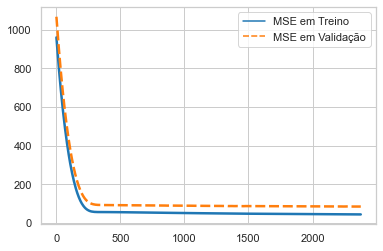

In [36]:
# Plot
sns.set(style = 'whitegrid')
sns.lineplot(data = df, palette = 'tab10', linewidth = 2.5)

In [37]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

4/4 [==============================] - 0s 7ms/step


In [38]:
# Imprime as previsões
previsoes

array([20.898163, 18.433136, 23.886627, 21.312042, 20.569492, 20.666878,
       24.495277, 21.902435, 21.056412, 20.861645, 25.840393, 23.41188 ,
       21.26944 , 22.711937, 23.241459, 21.61028 , 27.00291 , 23.338844,
       29.492283, 19.96693 , 20.435589, 21.001633, 19.23655 , 20.898163,
       19.005264, 23.497093, 22.858013, 14.336928, 17.24627 , 35.329227,
       21.488552, 18.268799, 20.015621, 22.791061, 31.61647 , 24.30051 ,
       21.80505 , 28.043701, 25.743008, 32.285984, 27.61156 , 30.673065,
       32.15208 , 17.24627 , 23.05278 , 23.265808, 18.396614, 23.5397  ,
       37.331688, 35.469215, 18.195763, 34.85448 , 31.166069, 25.901257,
       23.630997, 22.791061, 26.114285, 27.861103, 24.708305, 24.324856,
       23.162334, 19.096561, 23.399708, 22.797146, 21.099018, 20.234734,
       21.232918, 22.16415 , 21.646801, 21.555504, 27.05769 , 24.823948,
       10.940667, 14.056951, 17.161057, 23.338844, 17.544506, 18.019253,
       23.375362, 21.500725, 20.240822, 25.943863, 